In [2]:
import yrs_months
import os
import pandas as pd
import numpy as np
# Changes the notebook working directory on level up.
#%cd ..

# Running main python script.
%run -i "src/main.py"

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue
analyse gender representation? *takes up to 10 minutes* hit: [y]n


# Study how the catalog changes with the months:

In this part, we wish to study how the catalogue changes per month over the various years. This is to identify (if there are) any patterns in the publication of new content. 

We start off by studying how the overall content is added to the catalogue:

In [57]:
#Start by making a copy of initial data_set:
df = data_set[["type","date_added"]].copy()


#We skip the rows where date_added is unknown,
#because these entries are irrelevant to the pattern of 
#content publication:
df = df[df.date_added != "Unknown date_added"]

#We know the current dataset:
df.head(10) #Only displaying top 10. 

,type,date_added
0,Movie,"September 9, 2019"
1,Movie,"September 9, 2016"
2,TV Show,"September 8, 2018"
3,TV Show,"September 8, 2018"
4,Movie,"September 8, 2017"
5,TV Show,"September 8, 2017"
6,Movie,"September 8, 2017"
7,Movie,"September 8, 2017"
8,TV Show,"September 8, 2017"
9,Movie,"September 8, 2017"


Since we wish to create a heatmap for months versus years for added content, we need to extract months and years from the date_added column. This is done by the apply() function \[1] and using lambda functions:

In [58]:
df["year"] = df["date_added"].apply(lambda x: x.split(", ")[-1])  #Lambda: Iterates though every entry. Splits by comma and extracts the last value (which is year)
df["month"] = df["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
df.head(10) #Display changes

,type,date_added,year,month
0,Movie,"September 9, 2019",2019,September
1,Movie,"September 9, 2016",2016,September
2,TV Show,"September 8, 2018",2018,September
3,TV Show,"September 8, 2018",2018,September
4,Movie,"September 8, 2017",2017,September
5,TV Show,"September 8, 2017",2017,September
6,Movie,"September 8, 2017",2017,September
7,Movie,"September 8, 2017",2017,September
8,TV Show,"September 8, 2017",2017,September
9,Movie,"September 8, 2017",2017,September


In order to make a heatmap, we convert the dataframe to a dataframe where the index are years and the columns are months. Then, we can count the number of times content is added per month and year: 

In [59]:
df_grp = df.groupby("year") #Group dataframe by year to index it by years
df_grp = df_grp["month"].value_counts() #Counts unique values (year and month)
df_tab = df_grp.unstack() #Unstack to create a "tablezed" version of the dataframe. Source [https://riptutorial.com/pandas/example/6787/stacking-and-unstacking]
df_tab

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,11.0,1.0
2012,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN
2013,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,3.0,2.0
2014,2.0,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,4.0,1.0
2015,7.0,2.0,23.0,4.0,1.0,8.0,7.0,5.0,7.0,4.0,15.0,7.0
2016,23.0,44.0,98.0,16.0,44.0,31.0,19.0,19.0,14.0,47.0,53.0,48.0


Now we wish to replace NaNs by 0 and sort the columns by the months of the year:


In [61]:
df_tab = df_tab.fillna(0) #Fill NaNs with 0.

months = ["January","February","March","April","May","June","July",
         "August","September","October","November","December"]

df_tab = df_tab[months] #Sort colum by months
df_tab

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0
2013,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0
2014,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,5.0,6.0
2015,1.0,4.0,5.0,7.0,7.0,7.0,8.0,2.0,7.0,15.0,4.0,23.0
2016,44.0,16.0,19.0,23.0,14.0,19.0,31.0,44.0,48.0,53.0,47.0,98.0


Finally, we may use this "tablelized" dataframe to plot a nice heatmap:

Text(0, 0.5, 'Year')

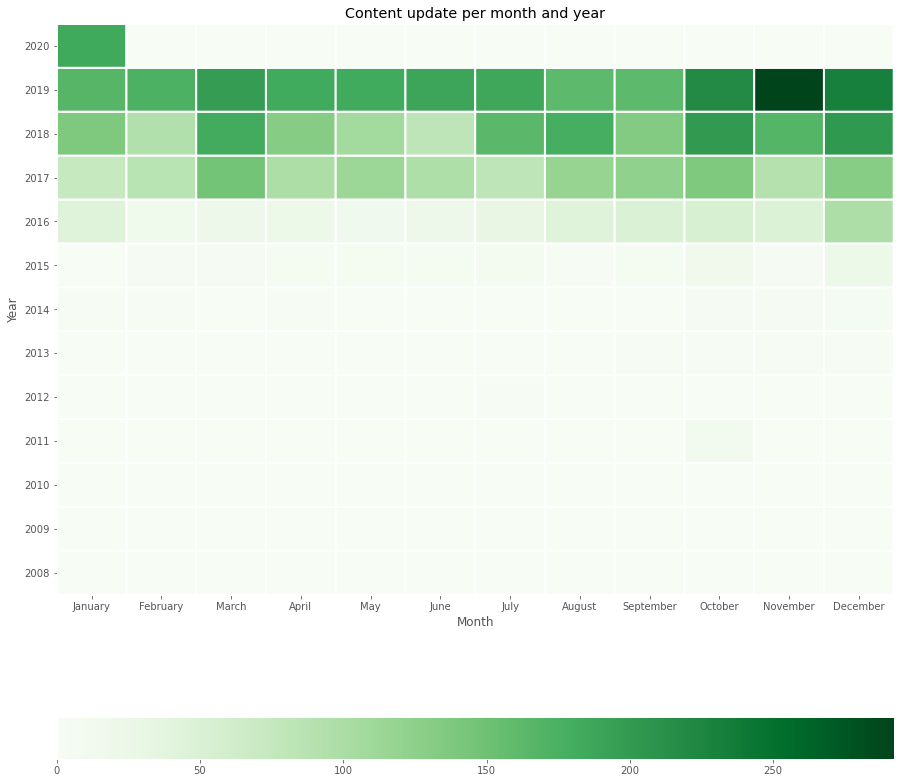

In [66]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
plt.figure(figsize=(15,15))
plt.pcolor(df_tab, cmap="Greens", edgecolors = "white",linewidths=2) #Source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.xticks(np.arange(0.5, len(df_tab.columns), 1), df_tab.columns) #Notice 0.5 to get months and years in middle of sqaures
plt.yticks(np.arange(0.5, len(df_tab.index), 1), df_tab.index)
plt.colorbar(orientation="horizontal") #Adds colorbar to the plot
plt.title("Content update per month and year")
plt.xlabel("Month")
plt.ylabel("Year")

We see that the amount of content update per month has been steadily increasing since the end of 2016. The figure also clearly indicated that November of 2019 was the month where the most contend were added. If the last total year of data (2019) is considered, we see that there less content beeing added in august and september. Therefore, adding data these months might increase the probability of success, as there is less competition among new content these months.

Now that we have an overall view of the added content on a per month basis, we can closer study when specific content is added to the catalogue.

The process above has been defined into functions in the yrs_months.py-file, so we only need to get a relevant dataframe and then the process  is done by the function heatplot_analysis(). 

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["month"] = dataframe["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["year"

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2014,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,4.0,1.0,7.0
2016,1.0,4.0,2.0,5.0,4.0,4.0,13.0,8.0,10.0,16.0,12.0,38.0


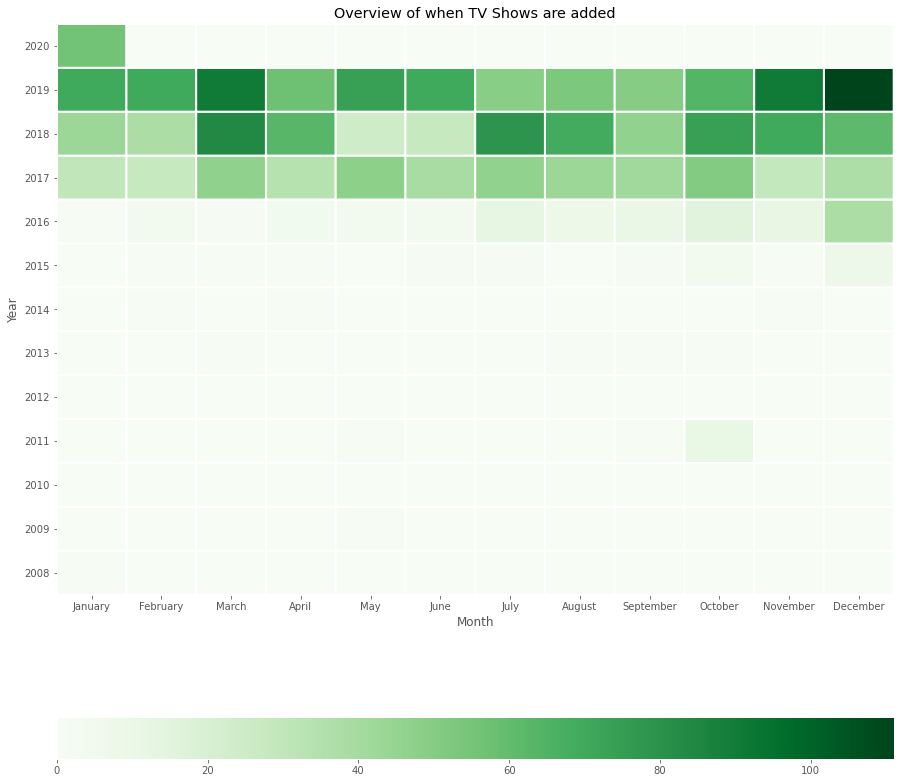

In [67]:
#Checking when TV Shows are added: 

df = data_set[["date_added","type"]].copy()
df_shows = df.loc[df["type"] == "TV Show"]

yrs_months.heatplot_analysis(df_dramas,"Overview of when TV Shows are added","Month","Year")


We see that for TV Shows, there has been a steady increase in content starting in December 2016. The most TV Shows were added in December of 2019. The amount of content added during this month was over 100 titles, as seen from in the colorscheme. 

Now let us get an overview of when movies have been added:

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["month"] = dataframe["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["year"

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
2014,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,5.0
2015,1.0,3.0,3.0,1.0,5.0,4.0,5.0,2.0,6.0,10.0,2.0,16.0
2016,15.0,9.0,15.0,15.0,9.0,11.0,19.0,25.0,29.0,34.0,29.0,54.0


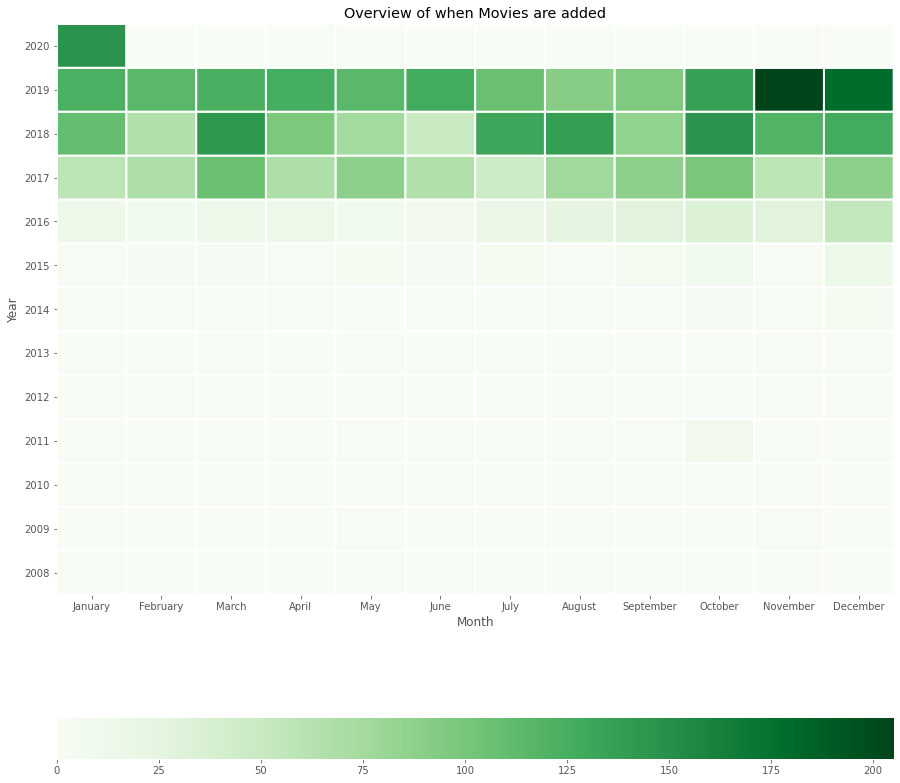

In [68]:
df_movie = df.loc[df["type"] == "Movie"]

yrs_months.heatplot_analysis(df_movie,"Overview of when Movies are added","Month","Year")

From the above figure, we see that November of 2019 was the month were most movies were added to the catalogue. This month, there where over 200 movie titles added. This is approximately twice as many movies added in Novembr 2019 compared to TV shows added in December 2019, which was the month most TV shows were added. This might be because it is easier to produce a movie compared to an enitre TV show. 

Now let us study some genre specific content and see if there are any patterns. 

The first place to start when determining if there are any seasonal patterns in the publication of conent is perhaps the most obvious: christmas content. Naturally, one might expect this content to be added to the catalogue towards christmas (november and december). 

Since Christmas is not a unique genre, we identify christmas movies by extracting all rows where the word "Christmas" is in the description column. 

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


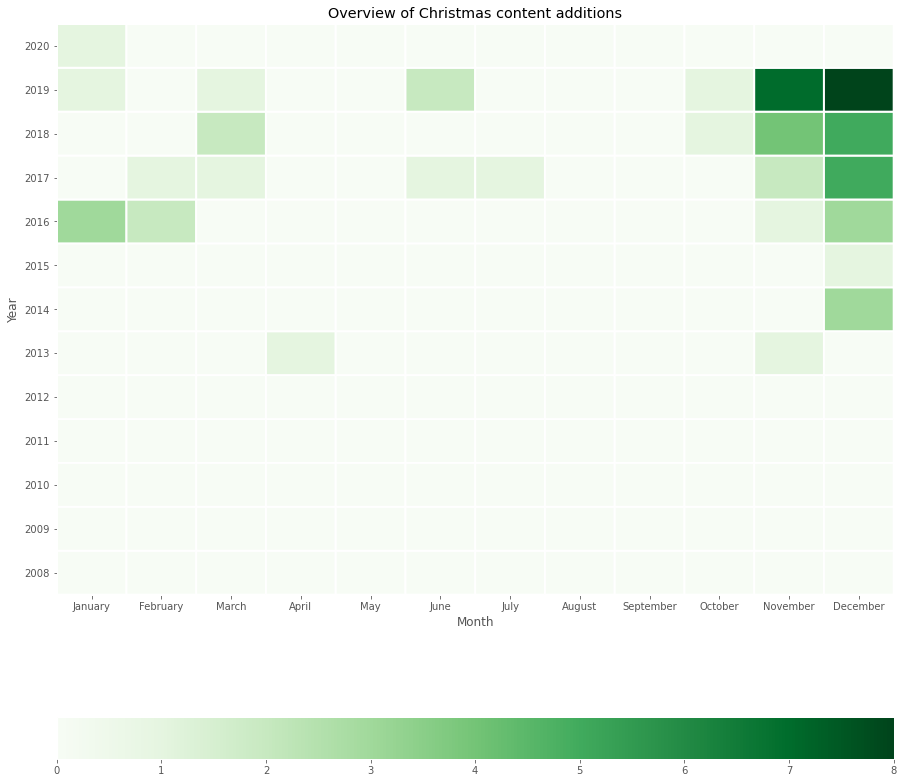

In [69]:
df_xmas = data_set[["date_added","description"]].copy()
df_xmas = df_xmas[df_xmas["description"].str.contains("Christmas")]
yrs_months.heatplot_analysis(df_xmas,"Overview of Christmas content additions","Month","Year")

As seen from the above plot, there is a clear pattern in when Christmas related content is added to the Netflix catalogue. We see that most Christmas content is added in November and December.

Another category that might containt some pattern is Horror, which one might expect to come out before Halloween. Therefore, we check for when Horrer content is added: 

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0
2016,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0


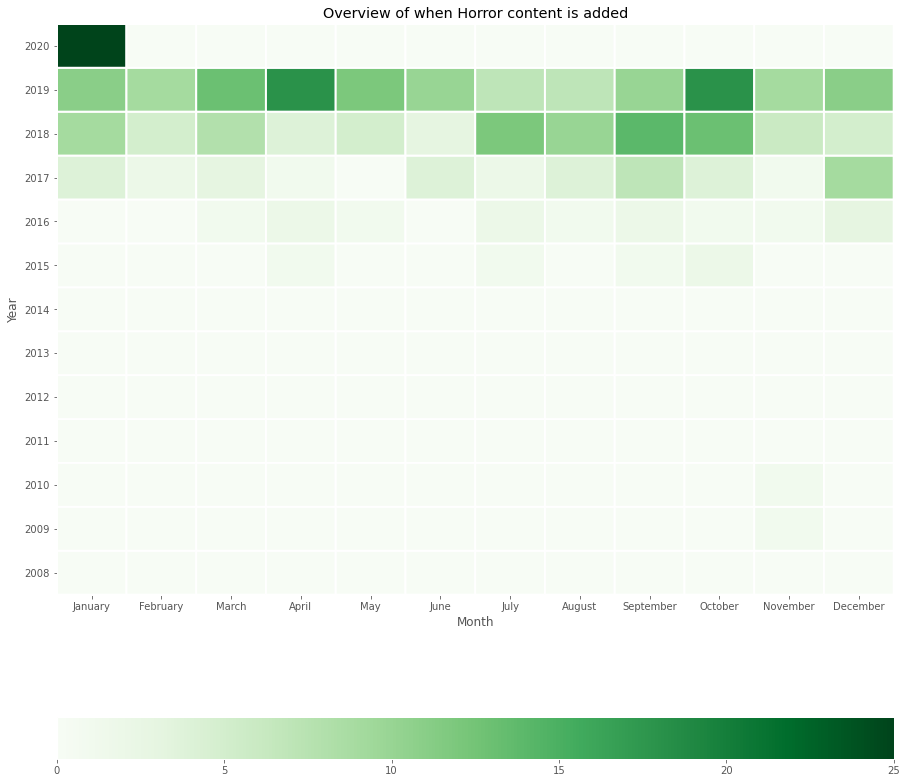

In [70]:
df_horror = data_set[["date_added","listed_in"]].copy()
df_horror = df_horror[df_horror["listed_in"].str.contains("Horror")]
yrs_months.heatplot_analysis(df_horror,"Overview of when Horror content is added","Month","Year")

We see that there is a large addition of Horror content (~25 titles) in January of 2020. Since the dataset stops at January 2020, it is difficult to make conclusions of the pattern of that specific year. By studying 2019, we see that May and October were two months when a significant amount of Horror relted content was added. For 2018, we see that September was the month with the most added Horror content. Thus, there is a weak pattern, but we cannot say definetly that Netflix adds more content before Halloween, as there were added large amounts in May 2019 and January 2020. 

Another category that might be of interest to study patterns in are love movies, and if there are any relation to the release of romantic movies around valentines:

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016,0.0,2.0,2.0,0.0,2.0,1.0,1.0,8.0,7.0,9.0,8.0,15.0


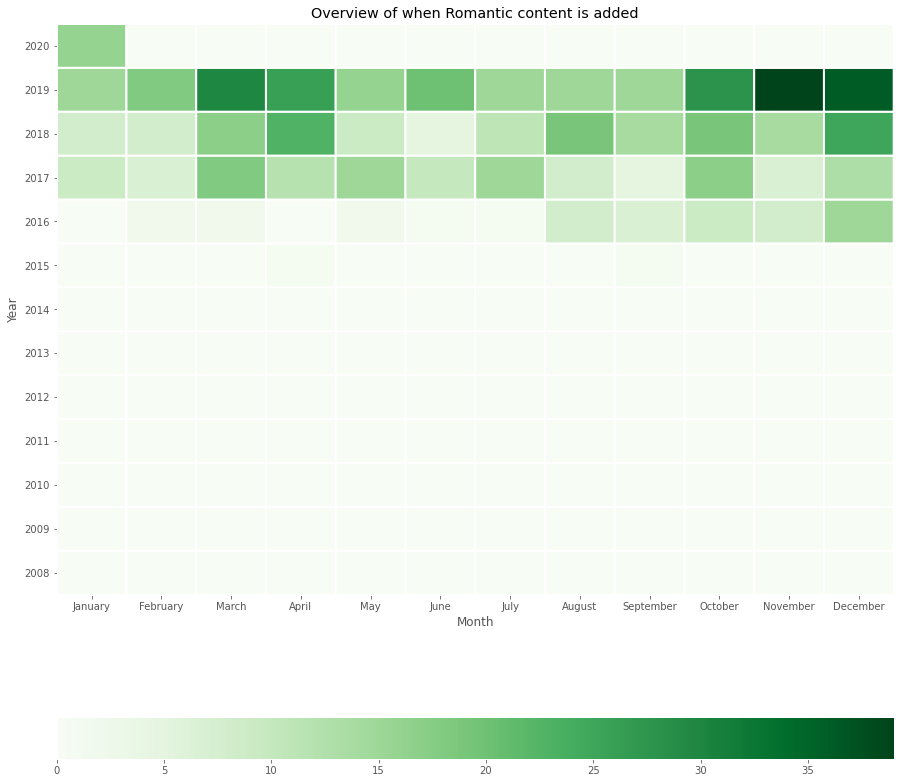

In [71]:
df_love = data_set[["date_added","listed_in"]].copy()
df_love = df_love[df_love["listed_in"].str.contains("Romantic")]
yrs_months.heatplot_analysis(df_love,"Overview of when Romantic content is added","Month","Year")

As can be seen form the above plot, there does not seem to be any relation between valentines day and the addition of Romantic content. 

Finally, we check to see if there are any relation between the addition of kids content and summer holiday and Christmas break: 

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["month"] = dataframe["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["year"

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2015,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,1.0,2.0
2016,24.0,4.0,0.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,1.0,1.0


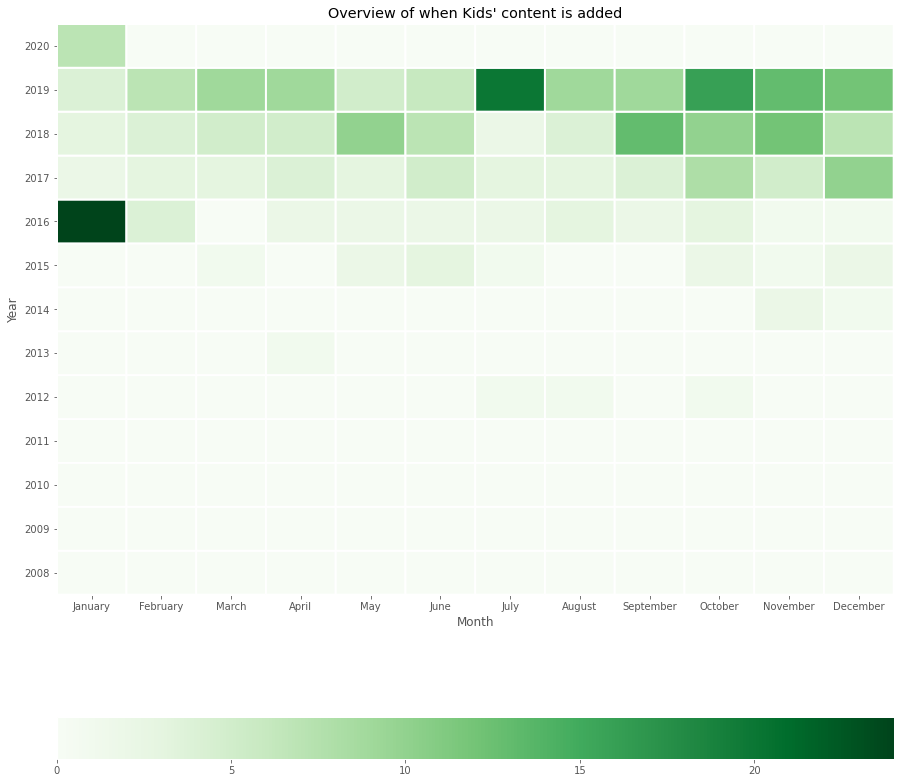

In [73]:
df_kids = data_set[["date_added","listed_in"]].copy()
df_kids = df_kids[df_kids["listed_in"].str.contains("Kids'")]
yrs_months.heatplot_analysis(df_kids,"Overview of when Kids' content is added","Month","Year")

In January of 2016, there was a large addition of kids' content to the catalogue. This is related to the fact that in January of 2016, Netflix announced that they would launch originals targeting kids \[4]. This is easily identified in the heatmap. There was a large addition of content in July 2019. However, none of the other years contain large summer releases, and we can therefore not conclude that there are any patterns in releasing content for kids around the summer holiday. For the period 2017-2019, if one compares the first half of the year (Jan-June) to the second half of the year (July-Dec), there seem to be more content coming out in the second half of the year. 

#### Sources

\[1] pandas.DataFrame.apply [online]. Accessed 27/11/2020. avalable at < https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html >

\[2] Stacking and unstacking [online]. Accessed 28/11/2020. Available at < https://riptutorial.com/pandas/example/6787/stacking-and-unstacking >

\[3] matplotlib.pyplot.pcolor [online]. Accessed 29/11/2020. Available at < https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolor.html >

\[4] Timeline of Netflix [online]. Accessed 06/12/2020. Available at < https://en.wikipedia.org/wiki/Timeline_of_Netflix >

